# **Challenge #1**

*Networking for Big Data and Laboratory, Sapienza University of Rome, Master in Data Science.*

Authors (Team 24, Zipf):

- Miguel Ángel Sánchez Cortés
- Pasquale Luca Tommasino
- Sofia Noemi Crobeddu
- Francesco Proietti

In [1]:
#Import the necessary libraries
import warnings
import matplotlib
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
from modules.netconnect import RandomNet
import networkx as nx
import random
from modules.topology import construct_jellyfish_topology, response_time_func
#Here we set the style of the plots
plt.rc('text', usetex=True)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=12)
plt.rc('font', family='serif')
warnings.filterwarnings('ignore')
matplotlib.rcParams['text.usetex'] = True

## **1.1: Complexity of Connectivity Algorithms**

In this part of the code we evaluate three methods to check connectivity testing on $p$-Erdös-Rényi Random Networks and $r$-Regular Random Networks.

In [150]:
def connectivity_complexity(model_name: str, parameter_val: float, max_node_size: int = 500, simulations: int = 10):
    """
    This function computes the time complexity of the three methods to check connectivity for a random network of a given size and parameter value.
    The function returns the number of nodes and the mean and standard deviation of the time taken to check connectivity for each method.
    
    The random network is generated using the RandomNet class from the netconnect module and can be oneof the following models:
        'erdos_renyi' for the Erdos-Renyi model
        'r-regular' for the r-regular model

    The methods to check connectivity are: breadth-first search, irreducibility and the Laplacian matrix.

    Args:
        model_name (str): The name of the model to generate the Random Network.
        parameter_val (float): The parameter value for the model.
        max_node_size (int): The maximum number of nodes to consider.
        simulations (int): The number of simulations to run for each number of nodes.

    Returns:
        tuple: A tuple containing the number of nodes and the mean and standard deviation of the time taken to check connectivity for each method.
    """
    
    #Here we initialize the number of nodes and the lists to store the mean and standard deviation of the time taken to check connectivity
    nodes = np.arange(100, max_node_size+1, 100)
    mean_time_bfs, mean_time_irr, mean_time_lapl = [], [], []
    sd_time_bfs, sd_time_irr, sd_time_lapl = [], [], []

    #Here we iterate over the number of nodes and for each node we run the simulations to check the time taken to check connectivity
    for node in nodes:
        #Here we initialize the lists to store the time taken to check connectivity for each simulation
        node_time_bfs, node_time_irr, node_time_lapl = [], [], []
        for _ in range(simulations):
            #Here we create a random network and check the time taken to check connectivity using the three methods
            net = RandomNet(n=node, param=parameter_val, model = model_name)
            _, t_bfs = net.check_connectivity(method='bfs')
            _, t_irr = net.check_connectivity(method='irreducibility')
            _, t_lapl = net.check_connectivity(method='laplacian')
            #Here we store the time taken to check connectivity for each method
            node_time_bfs.append(t_bfs)
            node_time_irr.append(t_irr)
            node_time_lapl.append(t_lapl)

        #Here we store the mean and standard deviation of the time taken to check connectivity for each method
        mean_time_bfs.append(np.mean(node_time_bfs))
        sd_time_bfs.append(np.std(node_time_bfs))
        mean_time_irr.append(np.mean(node_time_irr))
        sd_time_irr.append(np.std(node_time_irr))
        mean_time_lapl.append(np.mean(node_time_lapl))
        sd_time_lapl.append(np.std(node_time_lapl))

    #Here we return the number of nodes and the mean and standard deviation of the time taken to check connectivity for each method
    return nodes, mean_time_bfs, sd_time_bfs, mean_time_irr, sd_time_irr, mean_time_lapl, sd_time_lapl

#Here we run the simulations for the Erdos-Renyi model and the r-regular model
nodes, er_mean_time_bfs, er_sd_time_bfs, er_mean_time_irr, er_sd_time_irr, er_mean_time_lapl, er_sd_time_lapl = connectivity_complexity(max_node_size = 500, simulations = 10, model_name = 'erdos-renyi', parameter_val=0.8)
nodes, rr_mean_time_bfs, rr_sd_time_bfs, rr_mean_time_irr, rr_sd_time_irr, rr_mean_time_lapl, rr_sd_time_lapl = connectivity_complexity(max_node_size = 500, simulations = 10, model_name = 'r-regular', parameter_val=8)

## **1.1.1: Complexity of Connectivity Algorithms (Plots)**

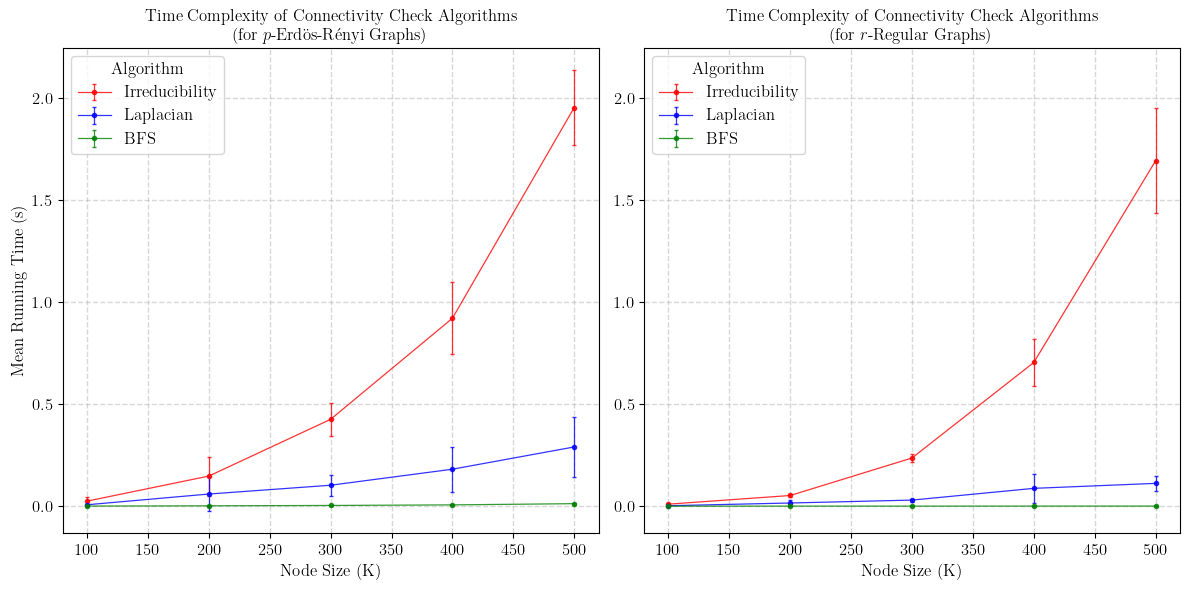

In [181]:
#Here we plot the time complexity of the three methods to check connectivity for Erdos-Renyi and r-regular graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#Here we do the first plot
ax1.errorbar(nodes, er_mean_time_irr, fmt=".-r", yerr=er_sd_time_irr, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='Irreducibility')
ax1.errorbar(nodes, er_mean_time_lapl, fmt=".-b", yerr=er_sd_time_lapl, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='Laplacian')
ax1.errorbar(nodes, er_mean_time_bfs, fmt=".-g", yerr=er_sd_time_bfs, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='BFS')
ax1.set_title("Time Complexity of Connectivity Check Algorithms \n (for $p$-Erdös-Rényi Graphs)")
ax1.legend(title="Algorithm", title_fontsize = 12)
ax1.grid(alpha = 0.5, linestyle='--', linewidth=1)
ax1.set_ylabel("Mean Running Time (s)")
ax1.set_xlabel("Node Size (K)")

#Here we do the second plot
ax2.errorbar(nodes, rr_mean_time_irr, fmt=".-r", yerr=rr_sd_time_irr, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='Irreducibility')
ax2.errorbar(nodes, rr_mean_time_lapl, fmt=".-b", yerr=rr_sd_time_lapl, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='Laplacian')
ax2.errorbar(nodes, rr_mean_time_bfs, fmt=".-g", yerr=rr_sd_time_bfs, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='BFS')
ax2.set_title("Time Complexity of Connectivity Check Algorithms \n (for $r$-Regular Graphs)")
ax2.legend(title="Algorithm", title_fontsize = 12)
ax2.grid(alpha = 0.5, linestyle='--', linewidth=1)
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xlabel("Node Size (K)")

#Here we save the plot
plt.tight_layout()
plt.savefig("plots/connectivity_complexity.png", dpi=300)
pass

## **1.2: Probability of Connectivity (Monte Carlo Simulations)**

In this part of the code we perform Monte Carlo Simulations to estimate the Probability of Connectivity for $p$-Erdös-Renyi graphs and $r$-Regular Graphs.

In [173]:
def monte_carlo_erdos_renyi(max_p: float, n: int = 100, simulations: int = 1000):
    """
    This function computes the probability of connectivity for a random Erdos-Renyi graph of a given size and different parameter values.
    The function returns the probability of connectivity and the standard deviation of the probability of connectivity for each parameter value.

    Args:
        n (int): The number of nodes in the Erdos-Renyi graph.
        p (float): The parameter value for the Erdos-Renyi graph.
        simulations (int): The number of simulations to run to estimate the probability of connectivity.

    Returns:
        tuple: A tuple containing the probability of connectivity and the standard deviation of the probability of connectivity.
    """
    
    #Here we initialize the range of parameter values
    p_values = np.arange(0, max_p+0.01, 0.01)

    #Here we initialize the lists to store the probability of connectivity and the standard deviation of the probability of connectivity
    prob_connected = []
    sd_prob_connected = []

    #Here we run the simulations to estimate the probability of connectivity for each parameter value
    for p in p_values:
        #Here we initialize the lists to store the results of the simulations
        is_connected = []
        #Here we run the simulations to estimate the probability of connectivity
        for _ in range(simulations):
            #Here we create a random Erdos-Renyi graph and check if it is connected
            net = RandomNet(n=n, param=p, model = 'erdos-renyi')
            connected = net.check_connectivity(method='bfs')[0]
            #Here we store the result of the simulation
            is_connected.append(connected)
            
        #Here we compute the probability of connectivity and the standard deviation of the probability of connectivity
        prob_connected.append(np.mean(is_connected))
        sd_prob_connected.append(np.std(is_connected))

    #Here we return the p_values and the probability of connectivity and the standard deviation of the probability of connectivity
    return p_values, prob_connected, sd_prob_connected

def monte_carlo_r_regular(r: float, max_n: int = 100, simulations: int = 1000):
    """
    This function computes the probability of connectivity for a random r-Regular graph of a given r and different number of nodes.
    The function returns the probability of connectivity and the standard deviation of the probability of connectivity for each number of nodes.

    Args:
        r (int): The degree of the r-Regular graph.
        max_n (int): The maximum number of nodes to consider.
        simulations (int): The number of simulations to run to estimate the probability of connectivity.

    Returns:
        tuple: A tuple containing the number of nodes and the probability of connectivity and the standard deviation of the probability of connectivity.
    """
    
    #Here we initialize the range of node values
    n_values = np.arange(10, max_n+1, 2)

    #Here we initialize the lists to store the probability of connectivity and the standard deviation of the probability of connectivity
    prob_connected = []
    sd_prob_connected = []

    #Here we run the simulations to estimate the probability of connectivity for each parameter value
    for node in n_values:
        #Here we initialize the lists to store the results of the simulations
        is_connected = []
        #Here we run the simulations to estimate the probability of connectivity
        for _ in range(simulations):
            #Here we create a random Erdos-Renyi graph and check if it is connected
            net = RandomNet(n=node, param=r, model = 'r-regular')
            connected = net.check_connectivity(method='bfs')[0]
            #Here we store the result of the simulation
            is_connected.append(connected)
            
        #Here we compute the probability of connectivity and the standard deviation of the probability of connectivity
        prob_connected.append(np.mean(is_connected))
        sd_prob_connected.append(np.std(is_connected))

    #Here we return the n_values and the probability of connectivity and the standard deviation of the probability of connectivity
    return n_values, prob_connected, sd_prob_connected

def gaussian_confidence_interval(mean_list: list, sd_list: list):
    """
    This function computes the 95% confidence interval for a list of means and standard deviations using the Gaussian distribution.
    
    Args:
        mean_list (list): List of means
        sd_list (list): List of standard deviations
        alpha (float): Significance level
    
    Returns:
        tuple: Tuple containing the lower and upper bounds of the confidence interval
    """
    #Here we compute the confidence interval for the mean using the Gaussian distribution
    lower_bound = np.array(mean_list) - 1.96*np.array(sd_list)/np.sqrt(len(mean_list))
    upper_bound = np.array(mean_list) + 1.96*np.array(sd_list)/np.sqrt(len(mean_list))
    return lower_bound, upper_bound

#Here we run the simulations for the Erdos-Renyi model and the r-regular model
p_values, er_prob_connected, er_sd_prob_connected = monte_carlo_erdos_renyi(max_p = 0.25, n = 100, simulations = 1000)
n_values, rr_2_prob_connected, rr_2_sd_prob_connected = monte_carlo_r_regular(r = 2, max_n = 100, simulations = 1000)
n_values, rr_8_prob_connected, rr_8_sd_prob_connected = monte_carlo_r_regular(r = 8, max_n = 100, simulations = 1000)

#Here we compute the 95% confidence interval for the probability of connectivity
er_lower_bound, er_upper_bound = gaussian_confidence_interval(er_prob_connected, er_sd_prob_connected)
rr_2_lower_bound, rr_2_upper_bound = gaussian_confidence_interval(rr_2_prob_connected, rr_2_sd_prob_connected)
rr_8_lower_bound, rr_8_upper_bound = gaussian_confidence_interval(rr_8_prob_connected, rr_8_sd_prob_connected)

## **1.2.1: Probability of Connectivity (Plots)**

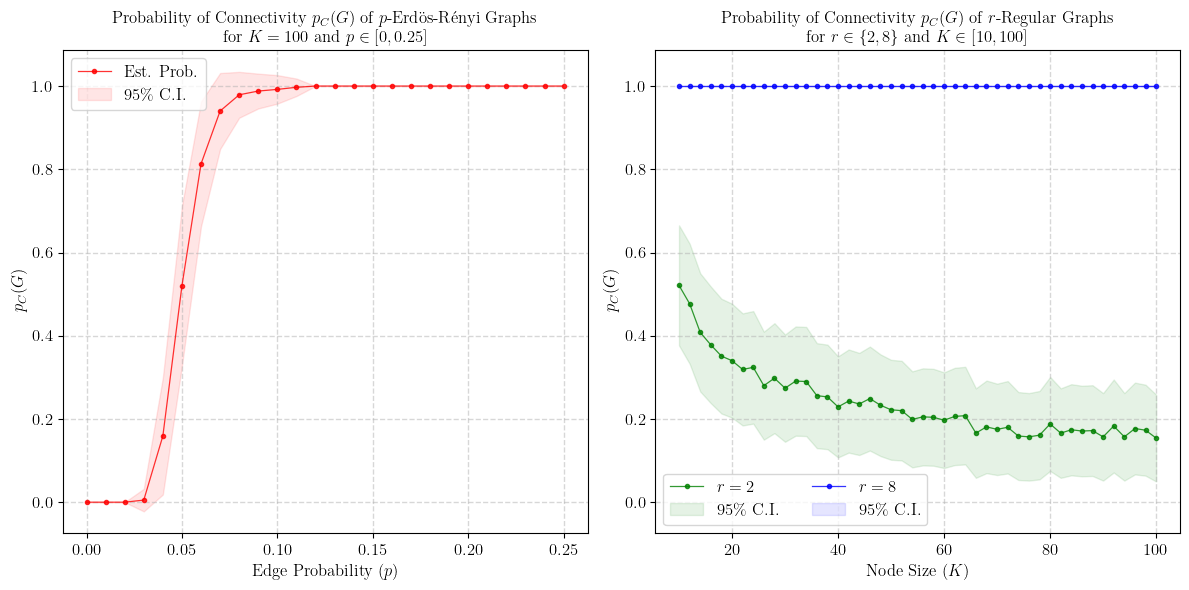

In [182]:
#Here we plot the time complexity of the three methods to check connectivity for Erdos-Renyi and r-regular graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#Here we do the first plot
ax1.plot(p_values, er_prob_connected, ".-r", linewidth=0.9, alpha=0.8, label='Est. Prob.')
ax1.fill_between(p_values, er_lower_bound, er_upper_bound, color='r', alpha=0.1, label='95\% C.I.')
ax1.set_title("Probability of Connectivity $p_{C}(G)$ of $p$-Erdös-Rényi Graphs \n for $K=100$ and $p \in [0, 0.25]$")
ax1.grid(alpha = 0.5, linestyle='--', linewidth=1)
ax1.set_xlabel("Edge Probability ($p$)")
ax1.set_ylabel("$p_{C}(G)$")
ax1.legend()

#Here we do the second plot
ax2.plot(n_values, rr_2_prob_connected, ".-g", linewidth=0.9, alpha=0.8, label='$r=2$')
ax2.fill_between(n_values, rr_2_lower_bound, rr_2_upper_bound, color='g', alpha=0.1, label='95\% C.I.')
ax2.plot(n_values, rr_8_prob_connected, ".-b", linewidth=0.9, alpha=0.8, label='$r=8$')
ax2.fill_between(n_values, rr_8_lower_bound, rr_8_upper_bound, color='b', alpha=0.1, label='95\% C.I.')
ax2.set_title("Probability of Connectivity $p_{C}(G)$ of $r$-Regular Graphs \n for $r \in \{2, 8\}$ and $K \in [10, 100]$")
ax2.grid(alpha = 0.5, linestyle='--', linewidth=1)
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xlabel("Node Size ($K$)")
ax2.set_ylabel("$p_{C}(G)$")
ax2.legend(ncol=2)

#Here we save the plot
plt.tight_layout()
plt.savefig("plots/connectivity_probability.png", dpi=300)
pass

## **2.1: Topology Algorithms**

In this part we implement the code for the two network types: $Flat-tree$ and $Jellyfish$

In [2]:
#Given constant data
Capacity = 10 #Gbit/s
tau_time = 0.000005 #s
L_file = 32000 #Gbit, 4000 GB, -size of the file to which the job is applied
L_out = 32000 #Gbit, 4000 GB, output of the task
E_X_time = 28800 #sec, mean of the random variable
T_0_time = 30 #sec, fixed set-up time of the job running on one server (A)
csi = 0.1 #numerical coefficient
fraction = 48/1500 #fraction of the original data (overhead)
n = 64 #number of ports
s = int((pow(n,3))/4) #number of servers per topology

### **2.1.1: Fat-Tree**

In [3]:
# Constructing the Fat Tree topology
# Define parameters for Fat Tree topology
r = 32
n = 1 + r + (int(pow(r, 2)))
graphs = []

#Create r*2 full rary trees and store them in a list
for i in range(r * 2):
    graphs.append((nx.full_rary_tree(r=r, n=n), 0))
    
#Join the full r-ary trees to create the Fat Tree topology
U = nx.join(graphs)
    
#Extract the servers in the topology
U_servers = [x for x in U.nodes() if U.degree(x) == 1]


In [4]:
#Calculating hops between server A and all other servers

#Randomly select a source server
source = random.choice(U_servers)
#Remove the selected source server from the list of servers
U_servers.remove(source)
#List to store shortest path lengths from source to each server node
hops = []

#Iterate over each target server node
for i in U_servers:
    #Compute the shortest path length from the source server to the current target server
    hops.append(nx.shortest_path_length(U, source, i))

#Sort the list of shortest path lengths in ascending order
hops.sort()
#Convert the list of shortest path lengths into a NumPy array
hops = np.array(hops)

In [5]:
#Number of simulations
num_sim = 100
#Number of N (max value iteration)
N = 10000

#Set the list used below
E_R_list = []
E_theta_list = []


#Loop over the number of servers from 1 to N...
for num_server in range(1, N+1):
    #Lists to store sample response times and sample theta values
    sample_R = []
    sample_theta = []
    
    #Iterate over the number of simulations
    for i in range(num_sim):
        #Calculate the response time and theta for the current number of servers
        R, th = response_time_func(Capacity, tau_time, L_file, L_out, E_X_time, T_0_time, fraction, num_server, hops)
        #Append the response time and theta to the sample lists
        sample_R.append(R)
        sample_theta.append(th)
    
    #Calculate the mean response time and mean theta for this number of servers
    E_R = np.mean(sample_R)
    E_R_list.append(E_R)
    E_theta = np.mean(sample_theta)
    E_theta_list.append(E_theta)


In [6]:
#Set the list used below
sample_R_baseline = []

#Generate samples for baseline response time
for i in range(num_sim):
    #Execution time
    X = np.random.exponential(scale=E_X_time)
    server_time = T_0_time + X
    sample_R_baseline.append(server_time)

#Calculate the mean of baseline response time
E_R_baseline = np.mean(sample_R_baseline)

#Normalize mean response times by dividing them with baseline mean response time
E_R_normalized = np.array(E_R_list) / E_R_baseline


In [7]:
#job running cost as a function of N

E_R_array = np.array(E_R_list)
E_theta_array = np.array(E_theta_list)

S = E_R_array + (csi * E_theta_array)

#S_baseline
S_baseline = E_R_baseline + (csi * E_R_baseline)

#S_normalized
S_normalized = S/S_baseline

### **2.1.2: Jellyfish**

In [8]:
#Number of ports
ports = 64
#Number of neighbor
r = ports//2
#Number of server
n_servers = ports**3//4
#Number of switch
n_switches = n_servers//(ports-r) 

In [9]:
#Create N (max range)
N = 10000

#Create simulation for Jellyfish topology
jelly = construct_jellyfish_topology(n_switches, ports, r, n_servers)

#Group servers from Jellyfish graph with degree = 1
jelly_servers = [x for x in jelly.nodes() if jelly.degree(x)==1]

In [10]:
#Select server A in a randomic choice
source = random.choice(jelly_servers)
#Remove the server A from the list
jelly_servers.remove(source)

#List of target nodes (servers) in the Jellyfish graph
target = jelly_servers

#List to store the shortest path lengths from the source node to each server node
hops = []

#Iterate over each server node in the target list...
for i in target:
    #...Compute the shortest path length from the source node to the current server node
    hops.append(nx.shortest_path_length(jelly, source, i))

#Sort the list of shortest path lengths in ascending order
hops.sort()

#Convert the list of shortest path lengths into a NumPy array
hops = np.array(hops)


In [11]:
#Number of simulations
num_sim = 100
#Number of N (max value iteration)
N = 10000

#Set the list used below
E_R_jelly_list = []
E_theta_jelly_list = []


#Loop over the number of servers from 1 to N...
for num_server in range(1, N + 1):
    #Lists to store sample response times and sample theta values
    sample_R = []
    sample_theta = []
    
    #Iterate over the number of simulations
    for i in range(num_sim):
        #Calculate the response time and theta for the current number of servers
        R, th = response_time_func(Capacity, tau_time, L_file, L_out, E_X_time, T_0_time, fraction, num_server, hops)
        #Append the response time and theta to the sample lists
        sample_R.append(R)
        sample_theta.append(th)
    #Calculate the mean response time and mean theta for this number of servers
    E_R = np.mean(sample_R)
    E_R_jelly_list.append(E_R)
    E_theta = np.mean(sample_theta)
    E_theta_jelly_list.append(E_theta)

Normalized mean response time as a function of N

In [12]:
#Mean responde time as a function of N
#-- E_R_jelly_list
#R baseline found from Fat-tree topology
#-- E_R_baseline

#Normalized mean response time as a function of N
E_R_jelly_normalized = E_R_jelly_list/E_R_baseline

Normalized job running cost as a function of N

In [13]:
#Convert the list of mean theta values into a NumPy array
E_theta_jelly_array = np.array(E_theta_jelly_list)
#Convert the list of mean response times into a NumPy array
E_R_jelly_array = np.array(E_R_jelly_list)

#Calculate the sum of the mean response time and csi times the mean theta for each number of servers
S_jelly = E_R_jelly_array + (csi * E_theta_jelly_array)

#Normalized Job running cost
S_jelly_normalized = S_jelly/S_baseline

### **2.1.3: Optimal value of N - Mean response time**

In [66]:
# Generate a range of values from 1 to N
x = range(1, N + 1)

# Fat Tree optimal number of servers
# Find the index of the minimum value in the normalized E_R_normalized list and get the corresponding value from the x range
opt_value_fat_er = x[list(E_R_normalized).index(min(E_R_normalized))]

# Jellyfish optimal number of servers
# Find the index of the minimum value in the normalized E_R_jelly_normalized list and get the corresponding value from the x range
opt_value_jelly_er = x[list(E_R_jelly_normalized).index(min(E_R_jelly_normalized))]

# Print the optimal number index of servers for Fat Tree and Jellyfish topologies
opt_value_fat_er, opt_value_jelly_er

(1019, 1053)

### **2.1.4: Plot normalized mean response time as a function of N**

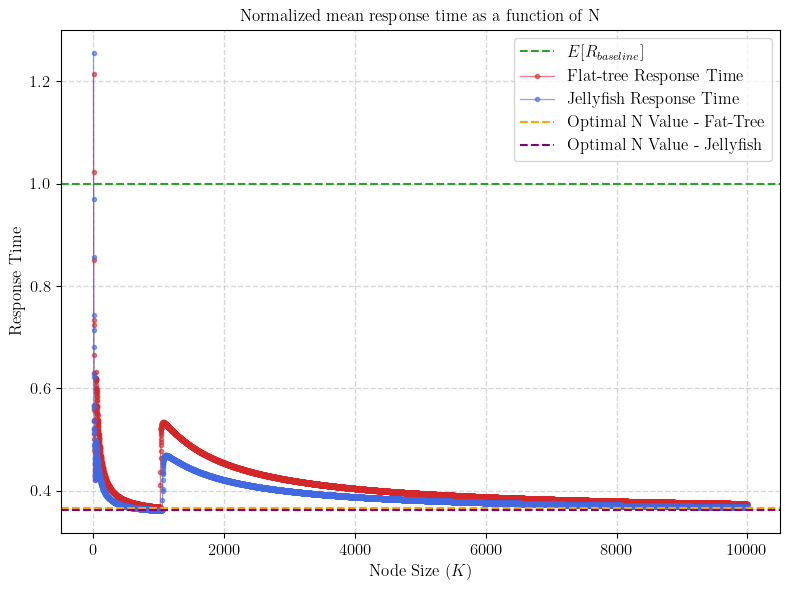

<Figure size 640x480 with 0 Axes>

In [80]:
#Create figure
plt.figure(figsize=(8, 6))

#Plot the R baseline
plt.axhline(y=1, color="tab:green", linestyle="--", label='$E[R_{baseline}]$')

#Plot the point for the Flat normalized value
plt.plot(range(1,N+1), E_R_normalized, '.-', color='tab:red', linewidth=0.9, alpha=0.6, label='Flat-tree Response Time')

#Plot the point for the Jellyfish normalized value
plt.plot(range(1,N+1), E_R_jelly_normalized, '.-', color='royalblue', linewidth=0.9, alpha=0.6, label='Jellyfish Response Time')

#Optimal Value
plt.axhline(y=min(E_R_normalized), color="orange", linestyle="--", label="Optimal N Value - Fat-Tree")
plt.axhline(y=min(E_R_jelly_normalized), color="purple", linestyle="--", label="Optimal N Value - Jellyfish")

#Title, label and grid
plt.title("Normalized mean response time as a function of N")
plt.xlabel("Node Size ($K$)")
plt.ylabel("Response Time")
plt.grid(alpha=0.5, linestyle='--', linewidth=1)

#Legend
plt.legend(loc='upper right')

#Show plot
plt.tight_layout()
plt.show()

#Here we save the plot
plt.savefig("plots/normalized_mean_response_time.png", dpi=300)
pass

### **2.1.5: Optimal value of N - Job running cost**

In [15]:
# Generate a range of values from 1 to N
x = range(1, N + 1)

# Fat Tree optimal number of servers
# Find the index of the minimum value in the normalized S list and get the corresponding value from the x range
opt_value_fat = x[list(S_normalized).index(min(S_normalized))]

# Jellyfish optimal number of servers
# Find the index of the minimum value in the normalized S_jelly list and get the corresponding value from the x range
opt_value_jelly = x[list(S_jelly_normalized).index(min(S_jelly_normalized))]

# Print the optimal number index of servers for Fat Tree and Jellyfish topologies
opt_value_fat, opt_value_jelly

(29, 280)

### **2.1.6: Plot normalized Job running cost as a function of N**

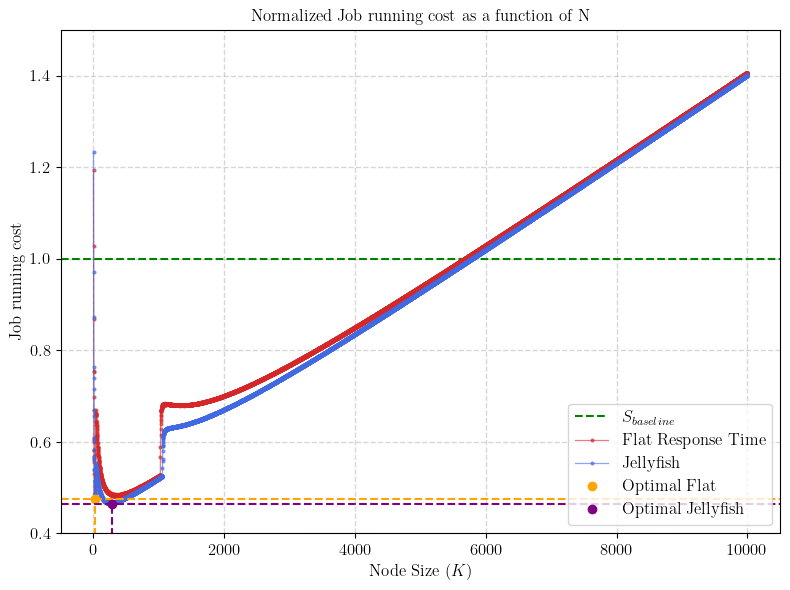

<Figure size 640x480 with 0 Axes>

In [77]:
#Create figure
plt.figure(figsize=(8, 6))

#Plot the line of S baseline
plt.axhline(y=1, color="green", linestyle="--", label='$S_{baseline}$')

#Plot the point for the Flat normalized value
plt.plot(range(1,N+1), S_normalized, '.-', color='tab:red', markersize=4, linewidth=0.9, alpha=0.6, label='Flat Response Time')

#Plot the point for the Jellyfish normalized value
plt.plot(range(1,N+1), S_jelly_normalized, '.-', color='royalblue', markersize=4, linewidth=0.9, alpha=0.6, label='Jellyfish')

# Mark specific points on the plot with dashed lines and markers
plt.plot([opt_value_fat], [min(S_normalized)], 'o', color= "orange", markersize=6, label='Optimal Flat') # Optimal Flat point
plt.plot([opt_value_fat, opt_value_fat], [0, min(S_normalized)], color="orange", linestyle="--")
plt.axhline(y=min(S_normalized), color="orange", linestyle="--")


plt.plot([opt_value_jelly], [min(S_jelly_normalized)], 'o', color= "purple", markersize=6, label='Optimal Jellyfish') # Optimal Jellyfish point
plt.plot([opt_value_jelly, opt_value_jelly], [0, min(S_jelly_normalized)], color="purple", linestyle="--") 
plt.axhline(y=min(S_jelly_normalized), color="purple", linestyle="--")

#Title, label and grid
plt.title("Normalized Job running cost as a function of N")
plt.xlabel("Node Size ($K$)")
plt.ylabel("Job running cost")
plt.grid(alpha=0.5, linestyle='--', linewidth=1)
plt.ylim(0.4, 1.5)

#Legend
plt.legend(loc='lower right')

#Show plot
plt.tight_layout()
plt.show()

#Here we save the plot
plt.savefig("plots/normalized_job_cost.png", dpi=300)
pass